
0: janelas_do_edifício_float_processed
1: janelas_do_edifício_não_float_processed
2: Janelas_de_veículo_float_processed
3: contentores
4: loiça de mesa
5: faróis
-: janelas_de_veículo_nao_float_processed (nenhum nesta base de dados)

Informações adicionais
1. Número de identificação: 1 a 214
2. RI: índice de refração
3. Na: Sódio (unidade de medida: percentagem em peso no óxido correspondente, tal como os atributos 4-10)
4. Mg: Magnésio
5. Al: Alumínio
6. Si: Silício
7. K: Potássio
8. Ca: Cálcio
9. Ba: Bário
10. Fe: Ferro
11. Tipo de vidro: (atributo de classe)
   - 0: janelas_do_edifício_float_processed
   - 1: janelas_do_edifício_não_float_processed
   - 2: Janelas_de_veículo_float_processed
   - 3: contentores
   - 4: louça de mesa
   - 5: faróis
   - -: janelas_de_veículo_nao_float_processed (nenhum nesta base de dados)





     https://archive.ics.uci.edu/dataset/42/glass+identification

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import correlation
from sklearn.decomposition import PCA
import xgboost as xgb
import numpy as np

# PRE-PROCESS

In [ ]:
!ls drive/MyDrive/Projeto\ aplicado\ -\ EU/

glass.csv


In [ ]:
data = pd.read_csv('/content/glass_modificado - glass.csv (1).csv')
#data = pd.read_csv('drive/MyDrive/Projeto aplicado - EU/glass.csv')
#data = pd.read_csv('/content/drive/MyDrive/Projeto aplicado - EU/glass.csv')
print(data)

      ID       RI     NA    MG    AL     SI     K    CA    BA   FE  TIPO_VIDRO
0      1  152.101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0           0
1      2  151.761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0           0
2      3  151.618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0           0
3      4  151.766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0           0
4      5  151.742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0           0
..   ...      ...    ...   ...   ...    ...   ...   ...   ...  ...         ...
209  210  151.623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0           5
210  211  151.685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0           5
211  212  152.065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0           5
212  213  151.651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0           5
213  214  151.711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0           5

[214 rows x 11 columns]


In [ ]:
matcorr = np.corrcoef(data.to_numpy()[:, 1:].transpose())

# Mapa de Calor da Matriz de Correlação

In [ ]:
sns.heatmap(matcorr, vmin=-1, vmax=1, cmap='jet')
# xticklabel

NameError: ignored

# Preparação de Dados: Exclusão da Coluna Inicial

In [ ]:
datatu = data.to_numpy()[:, 1:]
datatu

array([[152.101,  13.64 ,   4.49 , ...,   0.   ,   0.   ,   0.   ],
       [151.761,  13.89 ,   3.6  , ...,   0.   ,   0.   ,   0.   ],
       [151.618,  13.53 ,   3.55 , ...,   0.   ,   0.   ,   0.   ],
       ...,
       [152.065,  14.36 ,   0.   , ...,   1.64 ,   0.   ,   5.   ],
       [151.651,  14.38 ,   0.   , ...,   1.57 ,   0.   ,   5.   ],
       [151.711,  14.23 ,   0.   , ...,   1.67 ,   0.   ,   5.   ]])

# Extração da Última Coluna da Matriz de Dados Transformados

In [ ]:
datatu[:,-1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5.])

# Índice da Primeira Ocorrência do Valor 2 na Última Coluna

In [ ]:
list(datatu[:,-1]).index(2)

146

In [ ]:
janelas_edificil = np.mean(datatu[0:70,:], axis=0)

In [ ]:
janelas_edificil[1] / np.sum(janelas_edificil[1:9])

0.13256583886906592

In [ ]:
janelas_edificil[1] / np.sum(janelas_edificil)

0.05259801725856837

In [ ]:
data.mean()

ID            107.500000
RI            151.836542
NA             13.407850
MG              2.684533
AL              1.444907
SI             72.650935
K               0.497056
CA              8.956963
BA              0.175047
FE              0.057009
TIPO_VIDRO      1.542056
dtype: float64

In [ ]:
data.var()

ID            3834.166667
RI               0.092225
NA               0.666841
MG               2.080540
AL               0.249270
SI               0.599921
K                0.425354
CA               2.025366
BA               0.247227
FE               0.009494
TIPO_VIDRO       2.916063
dtype: float64

In [ ]:
data

,ID,RI,NA,MG,AL,SI,K,CA,BA,FE,TIPO_VIDRO
0,1,152.101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,0
1,2,151.761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,0
2,3,151.618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,0
3,4,151.766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,0
4,5,151.742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
209,210,151.623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,5
210,211,151.685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,5
211,212,152.065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,5
212,213,151.651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,5


from matplotlib import pyplot as plt
data['ID'].plot(kind='hist', bins=20, title='ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['RI'].plot(kind='hist', bins=20, title='RI')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['NA'].plot(kind='hist', bins=20, title='NA')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['MG'].plot(kind='hist', bins=20, title='MG')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='ID', y='RI', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='RI', y='NA', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='NA', y='MG', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='MG', y='AL', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ID']
  ys = series['RI']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('ID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ID')
_ = plt.ylabel('RI')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ID']
  ys = series['NA']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('ID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ID')
_ = plt.ylabel('NA')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ID']
  ys = series['MG']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('ID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ID')
_ = plt.ylabel('MG')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ID']
  ys = series['AL']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('ID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ID')
_ = plt.ylabel('AL')

from matplotlib import pyplot as plt
data['ID'].plot(kind='line', figsize=(8, 4), title='ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['RI'].plot(kind='line', figsize=(8, 4), title='RI')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['NA'].plot(kind='line', figsize=(8, 4), title='NA')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['MG'].plot(kind='line', figsize=(8, 4), title='MG')
plt.gca().spines[['top', 'right']].set_visible(False)

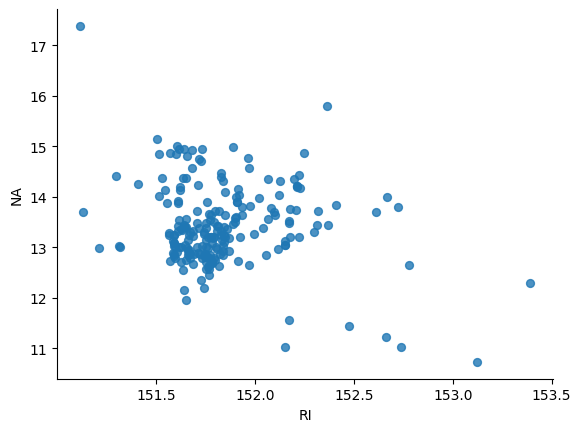

In [ ]:
from matplotlib import pyplot as plt
data.plot(kind='scatter', x='RI', y='NA', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

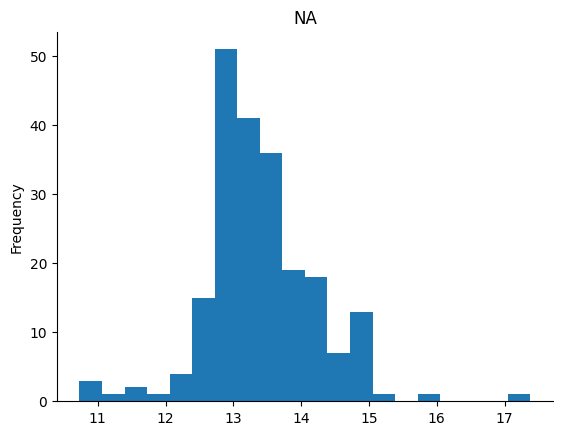

In [ ]:
from matplotlib import pyplot as plt
data['NA'].plot(kind='hist', bins=20, title='NA')
plt.gca().spines[['top', 'right',]].set_visible(False)

# A MÉDIA E VARIÂNCIA POR TIPO DE VIDRO

In [ ]:
data.groupby('TIPO_VIDRO').agg(['mean', 'median', 'var'])

ID                             RI                      \
             mean median         var        mean    median       var   
TIPO_VIDRO                                                             
0            35.5   35.5  414.166667  151.871829  151.7835  0.051443   
1           108.5  108.5  487.666667  151.861855  151.7100  0.144562   
2           155.0  155.0   25.500000  151.796353  151.7690  0.036724   
3           170.0  170.0   15.166667  151.892769  151.9940  0.111914   
4           181.0  181.0    7.500000  151.745556  151.8880  0.097081   
5           200.0  200.0   72.500000  151.711621  151.6510  0.064774   

                   NA                          MG  ...         K         CA  \
                 mean  median       var      mean  ...       var       mean   
TIPO_VIDRO                                         ...                        
0           13.242286  13.195  0.249302  3.552429  ...  0.046173   8.797286   
1           13.111711  13.155  0.441108  3.002105  ...  0.045679   9.073684   
2           13.437059  13.420  0.256935  3.543529  ...  0.052849   8.782941   
3           12.827692  12.970  0.603786  0.773846  ...  4.574017  10.123846   
4           14.646667  14.400  1.175100  1.305556  ...  0.000000   9.356667   
5           14.442069  14.390  0.471088  0.538276  ...  0.446883   8.491379   

                                    BA                         FE         \
            median       var      mean median       var      mean median   
TIPO_VIDRO                                                                 
0            8.675  0.330403  0.012714   0.00  0.007029  0.057000    0.0   
1            8.275  3.692682  0.050263   0.00  0.131291  0.079737    0.0   
2            8.790  0.144485  0.008824   0.00  0.001324  0.057059    0.0   
3           11.270  4.768942  0.187692   0.00  0.369969  0.060769    0.0   
4            9.570  2.102350  0.000000   0.00  0.000000  0.000000    0.0   
5            8.670  0.947712  1.040000   0.81  0.442679  0.013448    0.0   

                      
                 var  
TIPO_VIDRO            
0           0.007934  
1           0.011328  
2           0.011635  
3           0.024208  
4           0.000000  
5           0.000888  

[6 rows x 30 columns]

In [ ]:
import pandas as pd
from scipy.stats import shapiro

def shapiro_test_on_columns(dataframe):
    shapiro_results = {}

    for column in dataframe.columns:
        _, p_value = shapiro(dataframe[column])
        shapiro_results[column] = p_value

    return shapiro_results


# Aplicando o teste de Shapiro em todas as colunas
resultados_shapiro = shapiro_test_on_columns(data)

# Exibindo os resultados
for column, p_value in resultados_shapiro.items():
    print(f'Teste de Shapiro para {column}: p-value = {p_value}')

Teste de Shapiro para ID: p-value = 2.658151288414956e-06
Teste de Shapiro para RI: p-value = 1.0766174193474476e-12
Teste de Shapiro para NA: p-value = 3.4662537018448347e-07
Teste de Shapiro para MG: p-value = 2.3909611661875223e-19
Teste de Shapiro para AL: p-value = 2.083013299625236e-07
Teste de Shapiro para SI: p-value = 2.175188917874493e-09
Teste de Shapiro para K: p-value = 2.1721965417791313e-25
Teste de Shapiro para CA: p-value = 4.2866203996304243e-16
Teste de Shapiro para BA: p-value = 5.383263238128378e-26
Teste de Shapiro para FE: p-value = 1.156668784076633e-20
Teste de Shapiro para TIPO_VIDRO: p-value = 1.240060999340624e-16


In [ ]:
data.columns

Index(['ID', 'RI', 'NA', 'MG', 'AL', 'SI', 'K', 'CA', 'BA', 'FE',
       'TIPO_VIDRO'],
      dtype='object')

In [ ]:
data.head(3)

Correlação

cálculo de distância entre grupos

# Boxplots Comparativos dos Elementos por Classe de Vidro

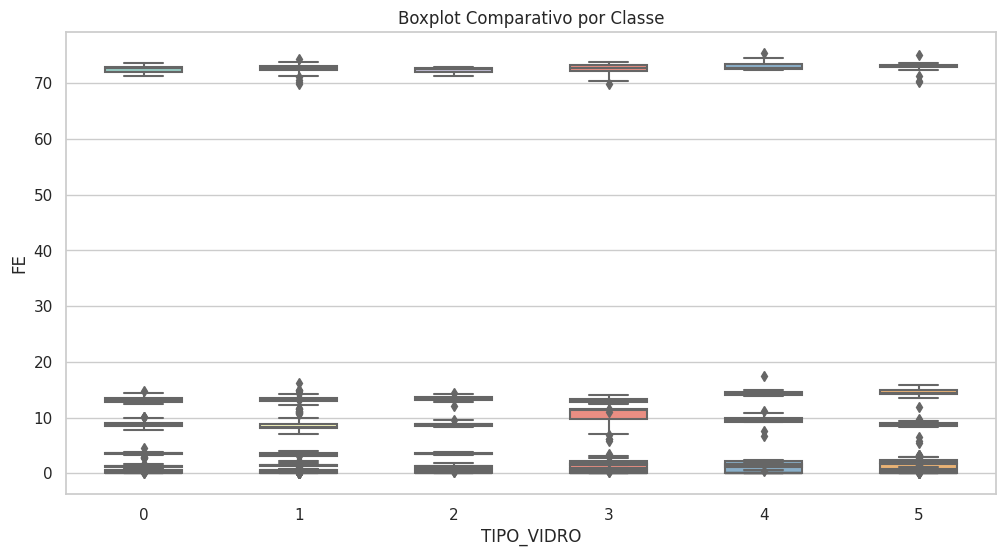

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Selecionar colunas relevantes (excluindo as duas primeiras e a última)
elementos = data.columns[2:-1]

# Boxplot comparativo por classe
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
for elemento in elementos:
    sns.boxplot(x='TIPO_VIDRO', y=elemento, data=data, width=0.5, palette='Set3')
plt.title('Boxplot Comparativo por Classe')
plt.show()

# Boxplots Comparativos por Elemento e Classe de Vidro

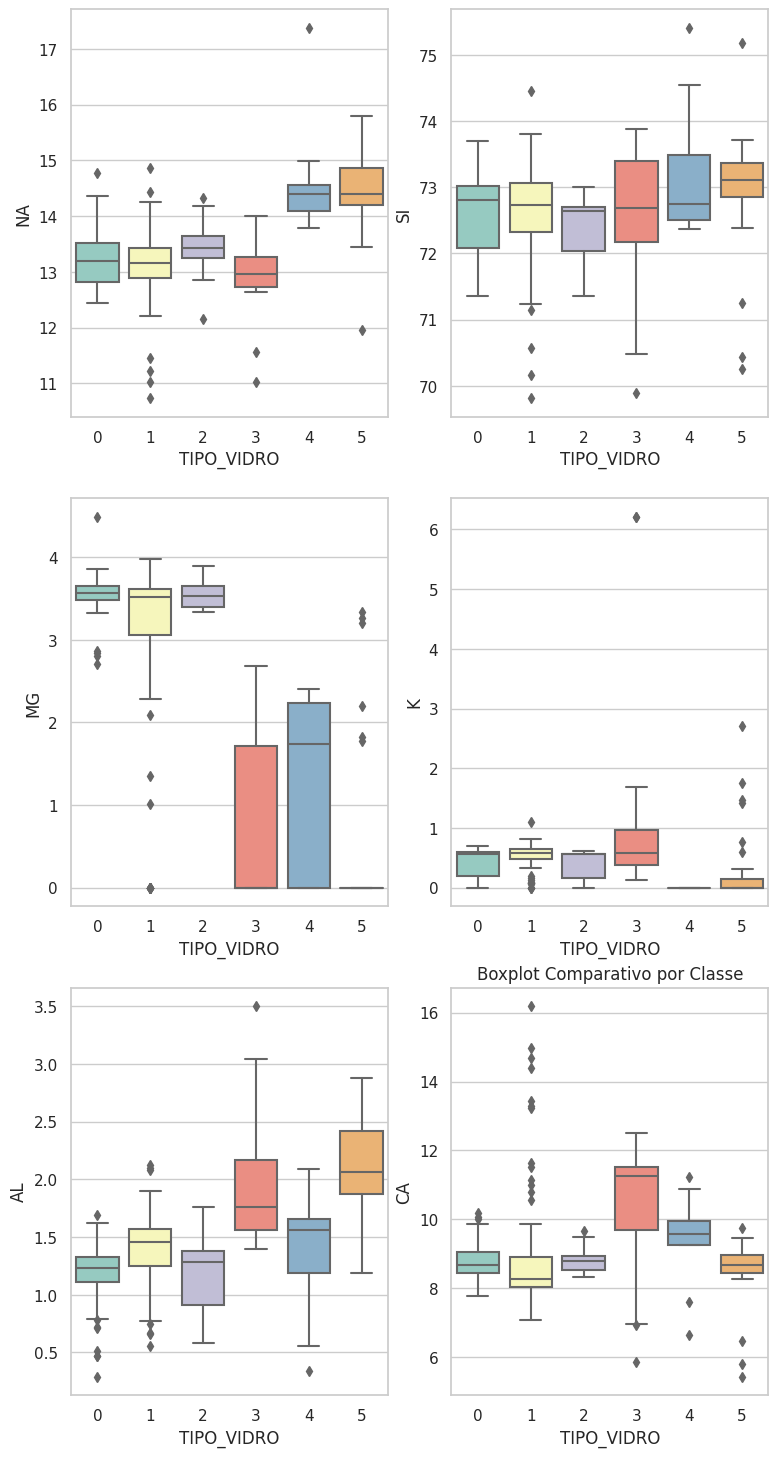

In [ ]:
# Boxplot comparativo por classe
#plt.figure(figsize=(9, 18))
fig, axes = plt.subplots(3, 2, figsize=(9, 18))
sns.set(style="whitegrid")
#elemento = elementos[1]
#sns.boxplot(x='TIPO_VIDRO', y=elemento, data=data, width=0.5, palette='Set3')
#for elemento in elementos:
for i in range(2):
  for j in range(3):
    elemento = elementos[i*3+j]
    sns.boxplot(ax=axes[j, i], x='TIPO_VIDRO', y=elemento, data=data,  palette='Set3')
plt.title('Boxplot Comparativo por Classe')
plt.show()

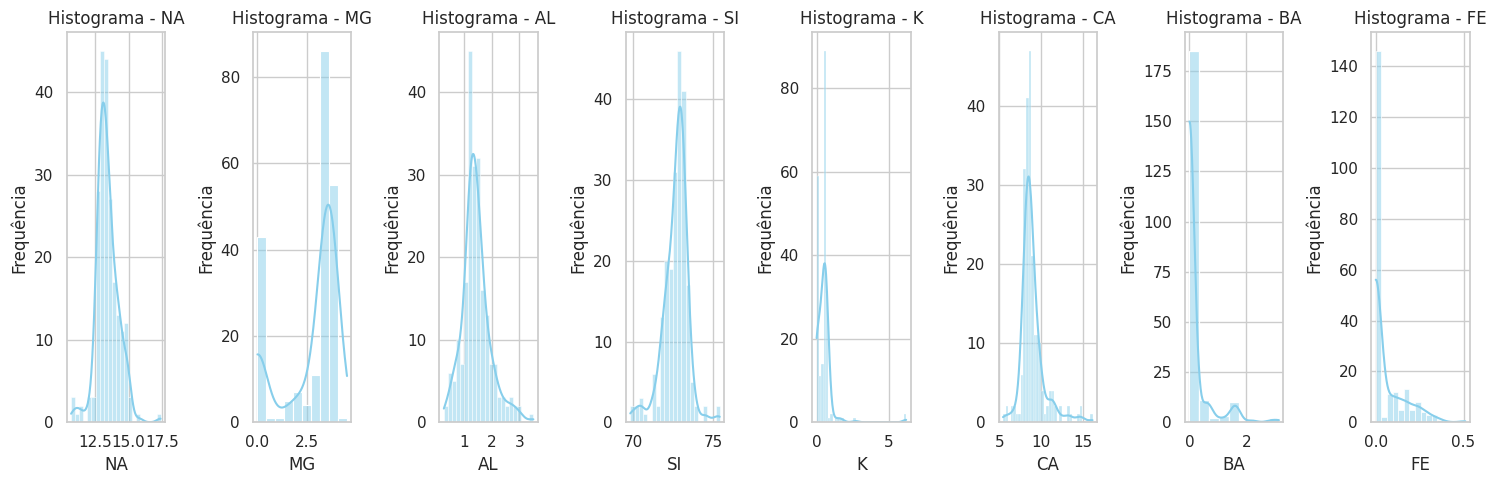

In [ ]:
# Histogramas por atributo em subplots
fig, axes = plt.subplots(nrows=1, ncols=len(elementos), figsize=(15, 5))
for i, elemento in enumerate(elementos):
    sns.histplot(data[elemento], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Histograma - {elemento}')
    axes[i].set_xlabel(elemento)
    axes[i].set_ylabel('Frequência')
plt.tight_layout()
plt.show()

In [ ]:
# -------------------------------------------------------------
# ------------------  Barplots  ------------------------------
# -------------------------------------------------------------
# Barplot plot a bar of vector, it is count data and make labels

# If label is not defined data is generated based values of array
# Else if label is defined they are changed automatically

def barplot(vet, labels='', color='#1f77b4', title='', reverse=True):
    import matplotlib.pyplot as plt
    import numpy as np

    listvet = list(set(vet))
    i = 0
    while(i < len(listvet)):
        if(isinstance(listvet[i], (float))):
            del listvet[i]
            break
        i += 1
#    if(isinstance(listvet[0], (float))):
#        keys = sorted(listvet[1:], reverse=reverse)
#    else:
#        keys = sorted(listvet, reverse=reverse)
    keys = sorted(listvet, reverse=reverse)
    counts = np.zeros([len(keys)])
    for key in keys:
        counts[keys.index(key)] = vet.count(key)

    if(labels!=''):
        temp = [];
        for key in keys:
            temp.append(labels[key]);
        keys = temp;

    plt.barh(np.arange(len(keys)), list(counts), color=color )
    plt.yticks(np.arange(len(keys)), keys)
    plt.title(title)
    plt.show()

    return [keys, counts];

# ----------------------------------------------------
# -----------------  Correlation matrix  -------------
# ----------------------------------------------------
def correlation_matrix(df, labels=[], title='', labelx = [], labely = [], save=False, size = 6, scalecolor='default'):
    '''
        correlation_matrix(df, labels=[], title='', labelx = [], labely = [], save=False, size = 6, scalecolor='default')

        Inputs:
        ----------------------------
        df : numpy.array
            enter with correlation matrix, you can get a this with:
            >> import numpy as np
            >> df = np.corrcoef(mat)
        labels : list
        title : string
        labelx : list
        labely : list
        save : boolean
        size : integer
        scalecolor : string

    '''
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm
    import numpy as np
#    df = (df+1)/2;
#    df = (df - df.min())/(df.max() - df.min())

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    if(scalecolor=='default'):
        cmap = cm.get_cmap('jet', 50)
    elif(scalecolor=='gray'):
        cmap = cm.get_cmap('gray')
    else:
        cmap = cm.get_cmap(scalecolor);
#    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    cax = ax1.imshow(df, interpolation="nearest", cmap=cmap)
    cax.set_clim(-1,1)

    ax1.grid(True)
    plt.title(title);

    if(len(labels)>0):
        # labels=['Sex','Length','Diam','Height','Whole','Shucked','Viscera','Shell','Rings',]
        T = np.arange(len(labels))
        ax1.set_yticks(T);
        ax1.set_xticklabels(labels,fontsize=size);
        ax1.set_yticklabels(labels,fontsize=size);
    if(len(labelx)>0):
        T = np.arange(len(labelx))
        ax1.set_xticks(T);
        ax1.set_xticklabels(labelx,fontsize=size);
    if(len(labely)>0):
        T = np.arange(len(labely))
        ax1.set_yticks(T);
        ax1.set_yticklabels(labely,fontsize=size)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    tick = [];
    for i in range(0,11):
        tick.append(1-i*0.2)

#    for i in range(0,11):
#        tick.append(1-i*0.05)
#    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
#    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    fig.colorbar(cax, ticks=tick)
#    fig.clim(-1, 1);

    plt.show()
    if(save):
        fig.savefig(title+'.png')

<ipython-input-17-a4b8f46c7f06>:73: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet', 50)


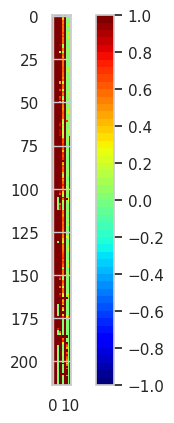

In [ ]:
correlation_matrix(data, size=20)

fazer gráfico da normalidade



Histograma e boxplot

boxplot - comparativo por classe e outro (cada coluna com cada classe)
histograma por cada atributo(coluna)
criar subplots do matplotlib





distância de matrizes
falar em dos dados

análise dos boxplot

medidas de similaridade




In [ ]:
data_array = data.to_numpy()

# Calculando a Distância Euclidiana
euclidean_distances = pairwise_distances(data_array, metric='euclidean')

# Calculando a Correlação de Pearson
pearson_correlation = 1 - np.corrcoef(data_array)

# Exibindo os resultados
print("Distância Euclidiana:")
print(euclidean_distances)

print("\nCorrelação de Pearson:")
print(pearson_correlation)


mahalanobis_distances = []
for i in range(len(data_array)):
    mahalanobis_distance = np.sqrt((data_array[i] - mean_vector).T @ inv_cov_matrix @ (data_array[i] - mean_vector))
    mahalanobis_distances.append(mahalanobis_distance)

mahalanobis_distances = np.array(mahalanobis_distances)

print("\nDistância de Mahalanobis:")
print(mahalanobis_distances)



Distância Euclidiana:
[[  0.           1.99075363   2.79937297 ... 211.12319886 212.12379899
  213.12185833]
 [  1.99075363   0.           1.12389902 ... 210.10111165 211.10054666
  212.10053465]
 [  2.79937297   1.12389902   0.         ... 209.10089385 210.09992263
  211.09992006]
 ...
 [211.12319886 210.10111165 209.10089385 ...   0.           1.10489638
    2.04516894]
 [212.12379899 211.10054666 210.09992263 ...   1.10489638   0.
    1.06667708]
 [213.12185833 212.10053465 211.09992006 ...   2.04516894   1.06667708
    0.        ]]

Correlação de Pearson:
[[0.00000000e+00 8.60013684e-05 1.67248824e-04 ... 4.82568968e-01
  4.85672752e-01 4.88102951e-01]
 [8.60013684e-05 0.00000000e+00 2.61762054e-05 ... 4.76856319e-01
  4.79939924e-01 4.82371727e-01]
 [1.67248824e-04 2.61762054e-05 0.00000000e+00 ... 4.71400884e-01
  4.74470239e-01 4.76892582e-01]
 ...
 [4.82568968e-01 4.76856319e-01 4.71400884e-01 ... 2.22044605e-16
  7.80480786e-06 2.13958710e-05]
 [4.85672752e-01 4.79939924e-01 4

NameError: ignored

In [ ]:

# Calculando a Distância de Mahalanobis
cov_matrix = np.cov(data_array, rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)
mean_vector = np.mean(data_array, axis=0)

mahalanobis_distances = []
for i in range(len(data_array)):
    mahalanobis_distance = np.sqrt((data_array[i] - mean_vector).T @ inv_cov_matrix @ (data_array[i] - mean_vector))
    mahalanobis_distances.append(mahalanobis_distance)

mahalanobis_distances = np.array(mahalanobis_distances)


print("\nDistância de Mahalanobis:")
print(mahalanobis_distances)


AttributeError: ignored

# ANÁLISE DOS ALGORITMOS

In [ ]:


# Dividindo os dados em características (X) e rótulos (y)
X = data.drop('TIPO_VIDRO', axis=1)
y = data['TIPO_VIDRO']

# Dividindo em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização
norm= Normalizer()
X_train = norm.fit_transform(X_train)
X_test = norm.transform(X_test)

# Regressão Logística
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# XGBoost
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
from sklearn.metrics import classification_report

# Regressão Logística
y_pred_logistic = logistic_model.predict(X_test)
print("Regressão Logística:")
print(classification_report(y_test, y_pred_logistic))

# Random Forest
y_pred_rf = rf_model.predict(X_test)
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))

# XGBoost
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost:")
print(classification_report(y_test, y_pred_xgb))


Regressão Logística:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       0.42      0.93      0.58        14
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         8

    accuracy                           0.56        43
   macro avg       0.22      0.32      0.26        43
weighted avg       0.37      0.56      0.43        43

Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         8

    accuracy                           1.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
import numpy as np
from matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

data = pd.read_csv('/content/glass_modificado - glass.csv (1).csv')

print(data.head())

print(data.dtypes)

print(data.isna().sum())

print(data.describe())

# 6. Teste de Normalidade de Shapiro-Wilk
for col in data.columns[1:9]:
    stat, p_value = stats.shapiro(data[col])
    print(f'O teste de Shapiro-Wilk para a variável {col} tem estatística = {stat} e p-valor = {p_value}')


# 8. Exploração de Relações entre Variáveis
correlation_matrix = data.corr()
print(correlation_matrix)



plt.figure(figsize=(12, 8))
sns.boxplot(data=data.drop(['ID', 'TIPO_VIDRO'], axis=1))
plt.title('Identificação de Outliers')
plt.show()

# 10. Transformações de Dados (Opcional)
# Dependendo dos resultados da análise exploratória, pode ser necessário realizar transformações nos dados.

# 11. Análise de Distribuição de Variáveis (Opcional)
# Considere a distribuição das variáveis para entender se elas seguem uma distribuição normal ou se têm algum padrão específico.

# 12. Análise de Grupos ou Clusters (Opcional)
# Se aplicável, tente identificar grupos naturais nos dados usando técnicas de clustering.

# 13. Documentação e Comunicação dos Resultados (Opcional)
# Mantenha um registro do processo de análise exploratória e, se necessário, prepare um relatório que comunique as principais descobertas.

# 14. Comparação de Algoritmos com K-Fold
# Vamos usar Random Forest, XGBoost e Regressão Linear


SyntaxError: ignored

In [ ]:

# Separando os dados em features (X) e target (y)
X = data.drop(['ID', 'TIPO_VIDRO'], axis=1)
y = data['TIPO_VIDRO']

# Definindo os modelos
models = {
    'Random Forest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(),
    'Linear Regression': LinearRegression()
}

# Definindo o número de splits para K-Fold
kf = KFold(n_splits=5)

# Avaliando os modelos
for model_name, model in models.items():
    scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        scores.append(score)

    print(f'{model_name}: Média do R^2 score = {np.mean(scores)}')


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar seus dados para um DataFrame
df = pd.read_csv('seu_dataset.csv')

# 2.1. Estatísticas Descritivas

# Calcular média, mediana, desvio padrão e quartis
mean_composition = df['element_composition'].mean()
median_composition = df['element_composition'].median()
std_composition = df['element_composition'].std()
quartiles_composition = df['element_composition'].quantile([0.25, 0.5, 0.75])

mean_refraction = df['refraction_index'].mean()
median_refraction = df['refraction_index'].median()
std_refraction = df['refraction_index'].std()
quartiles_refraction = df['refraction_index'].quantile([0.25, 0.5, 0.75])

print("Estatísticas de Composição do Vidro:")
print(f"Média: {mean_composition}")
print(f"Mediana: {median_composition}")
print(f"Desvio Padrão: {std_composition}")
print("Quartis:")
print(quartiles_composition)

print("\nEstatísticas de Índice de Refração:")
print(f"Média: {mean_refraction}")
print(f"Mediana: {median_refraction}")
print(f"Desvio Padrão: {std_refraction}")
print("Quartis:")
print(quartiles_refraction)

# 2.2. Visualização de Dados

# Histograma
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['element_composition'], kde=True)
plt.title('Histograma da Composição do Vidro')

plt.subplot(1, 2, 2)
sns.histplot(df['refraction_index'], kde=True)
plt.title('Histograma do Índice de Refração')
plt.tight_layout()
plt.show()

# Gráfico de Dispersão
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='element_composition', y='refraction_index', data=df)
plt.title('Gráfico de Dispersão')

# Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(x='element_composition', data=df)
plt.title('Box Plot da Composição do Vidro')
plt.tight_layout()
plt.show()
